In [1]:
import os 
import nibabel as nib 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import torch 
import os 
from glob import glob 
from tqdm import tqdm 

In [5]:
insp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/valid/inspiratory_BONE/COPDGene_L75615_BONE.nii.gz").get_fdata()
exp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/valid/expiratory_STANDARD/COPDGene_L75615_STANDARD.nii.gz").get_fdata()
insptoexp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/insp_exp_COPD_epoch5_val/COPDGene_L75615_BONE.nii.gz").get_fdata()
exptoinsp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method/COPDGene_L75615_STANDARD.nii.gz").get_fdata()

In [6]:
midslice_insp = insp.shape[2] // 2
midslice_exp = exp.shape[2] // 2


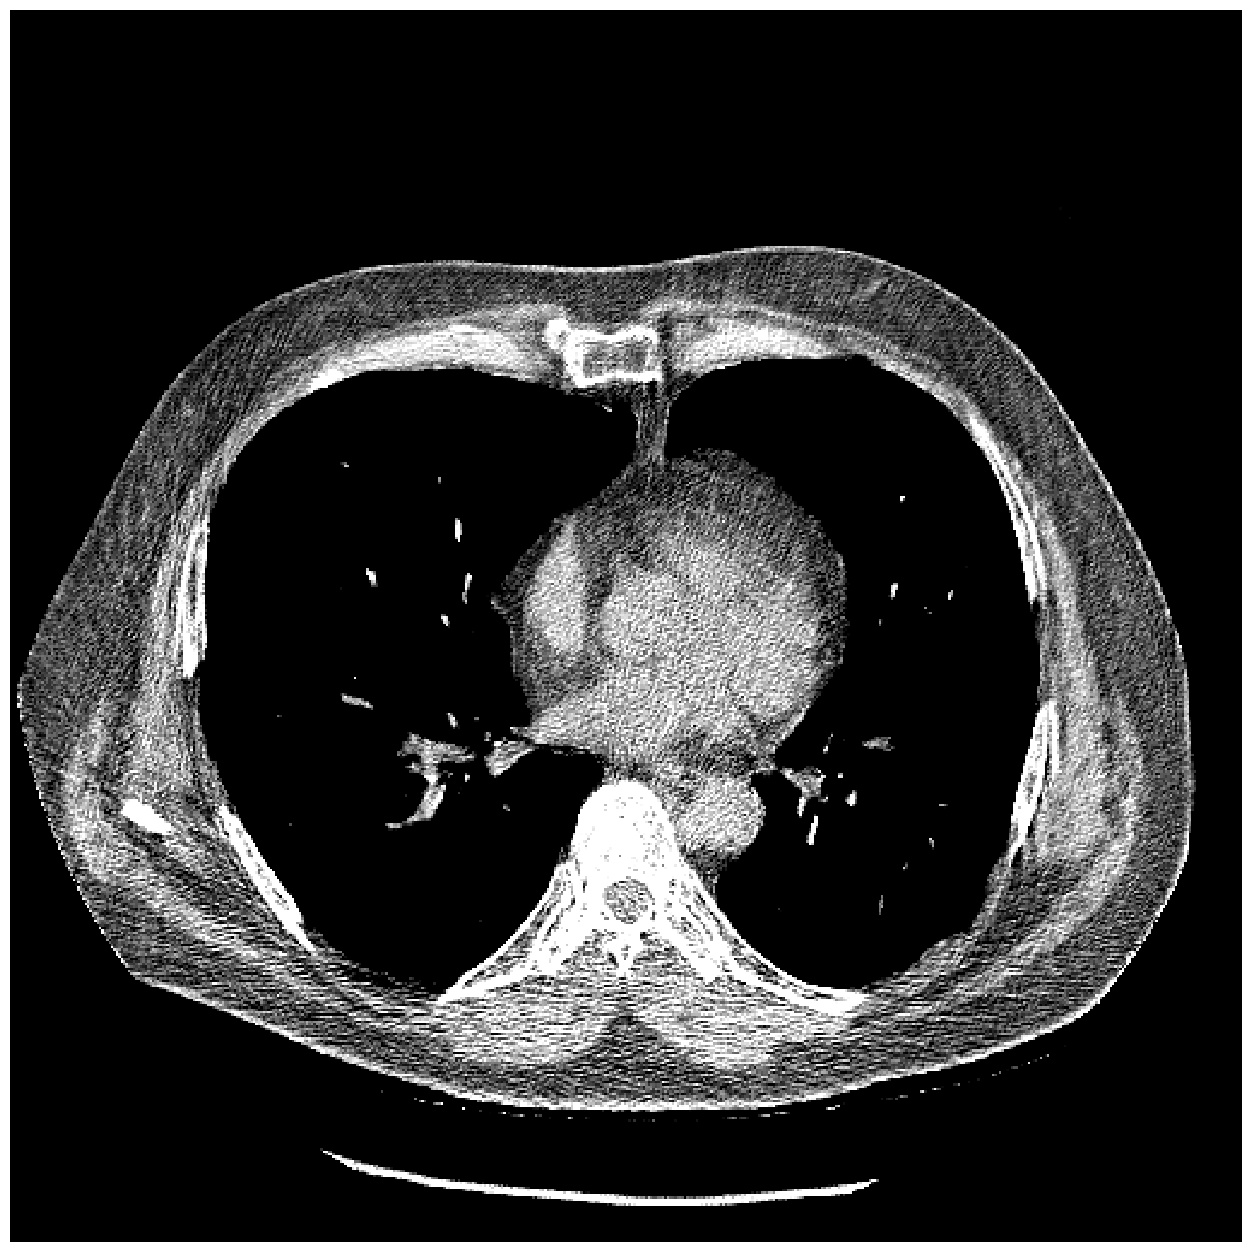

In [7]:
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(exptoinsp[:,:,midslice_exp]), cmap='gray', vmin=-150, vmax=150)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/harm_exptoisp_img.tiff", dpi=300, format='tiff')
plt.show()

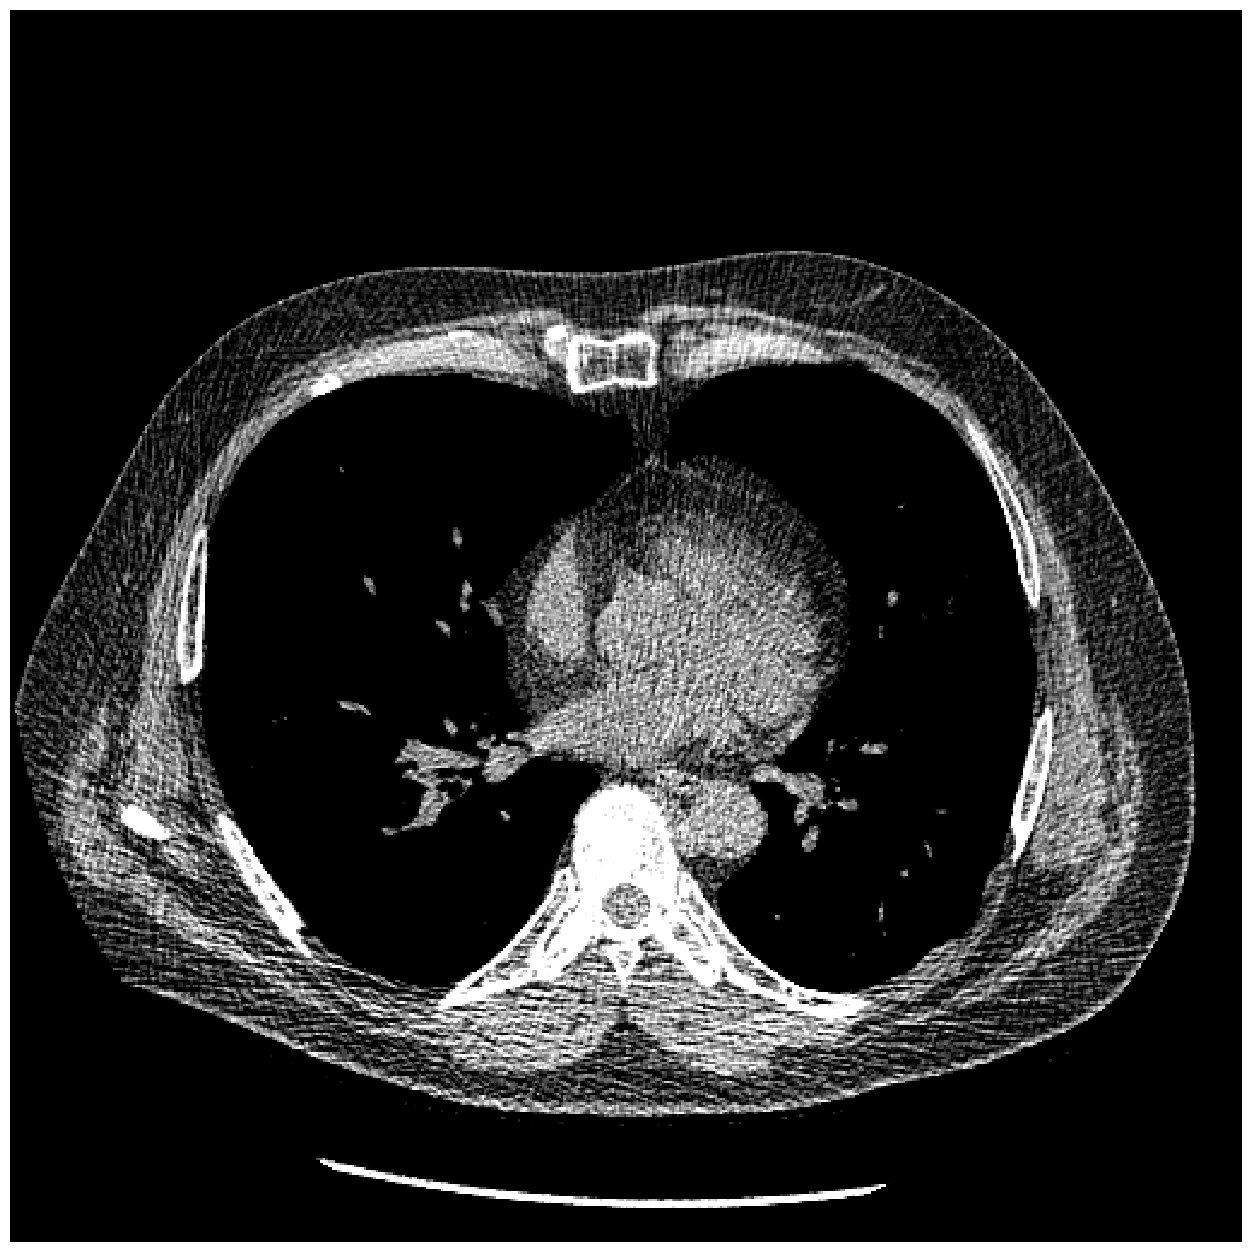

In [8]:
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(exp[:,:,midslice_exp]), cmap='gray', vmin=-150, vmax=150)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/exp_img.tiff", dpi=300, format='tiff')
plt.show()

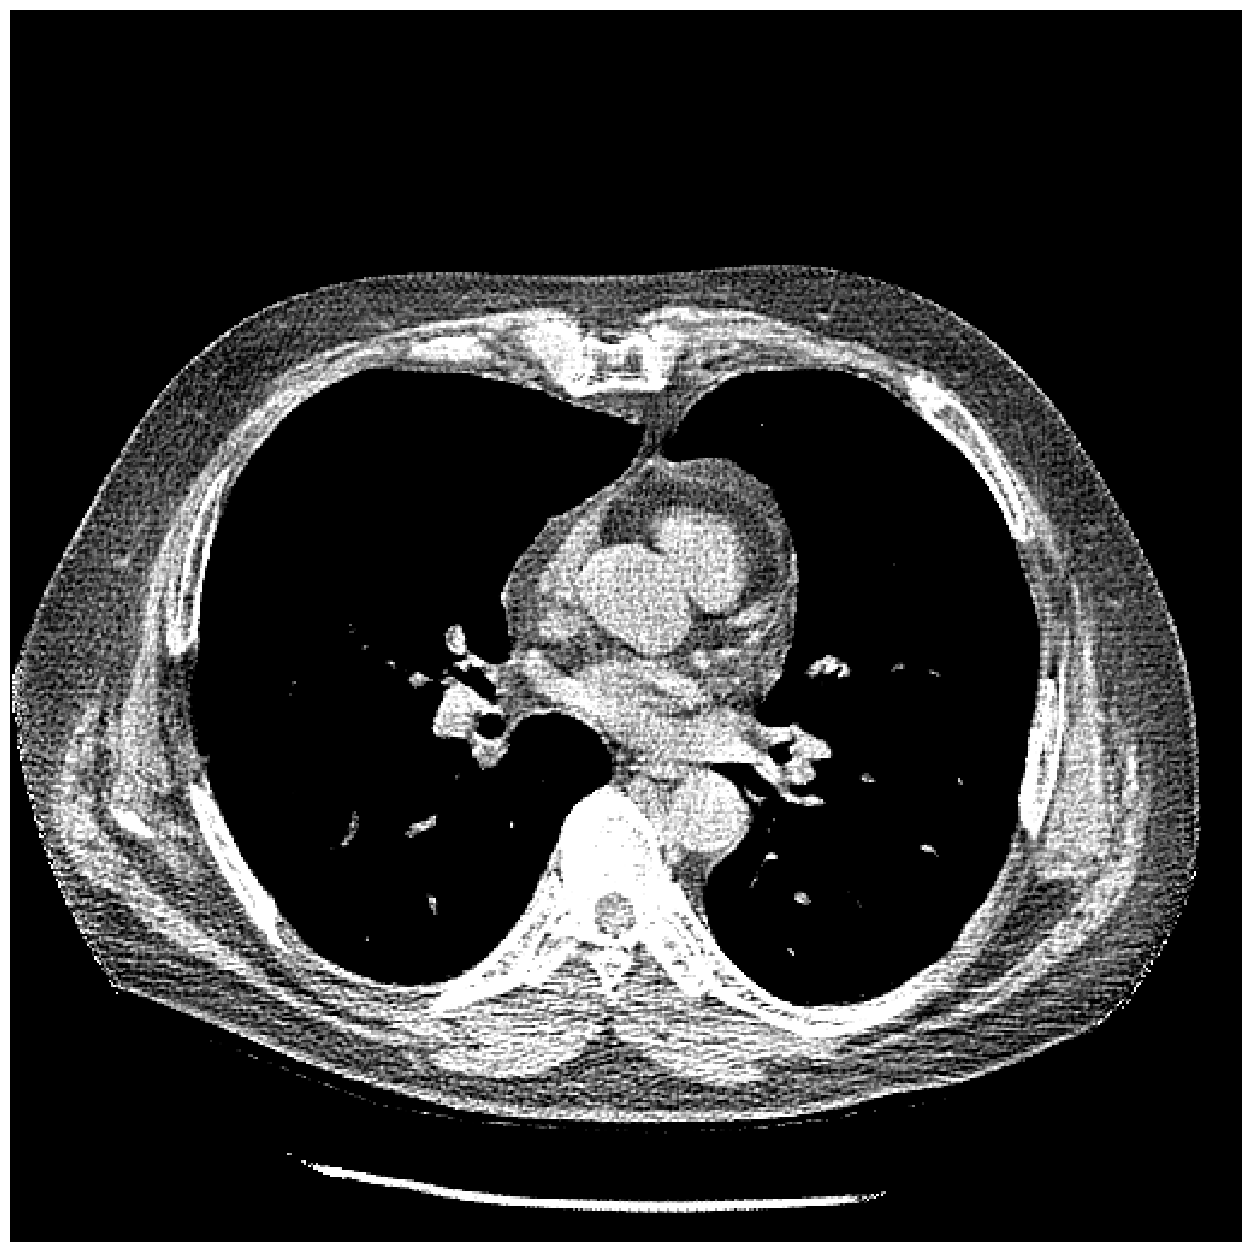

In [9]:
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(insptoexp[:,:,midslice_insp]), cmap='gray', vmin=-150, vmax=150)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/harm_isptoexp_img.tiff", dpi=300, format='tiff')
plt.show()

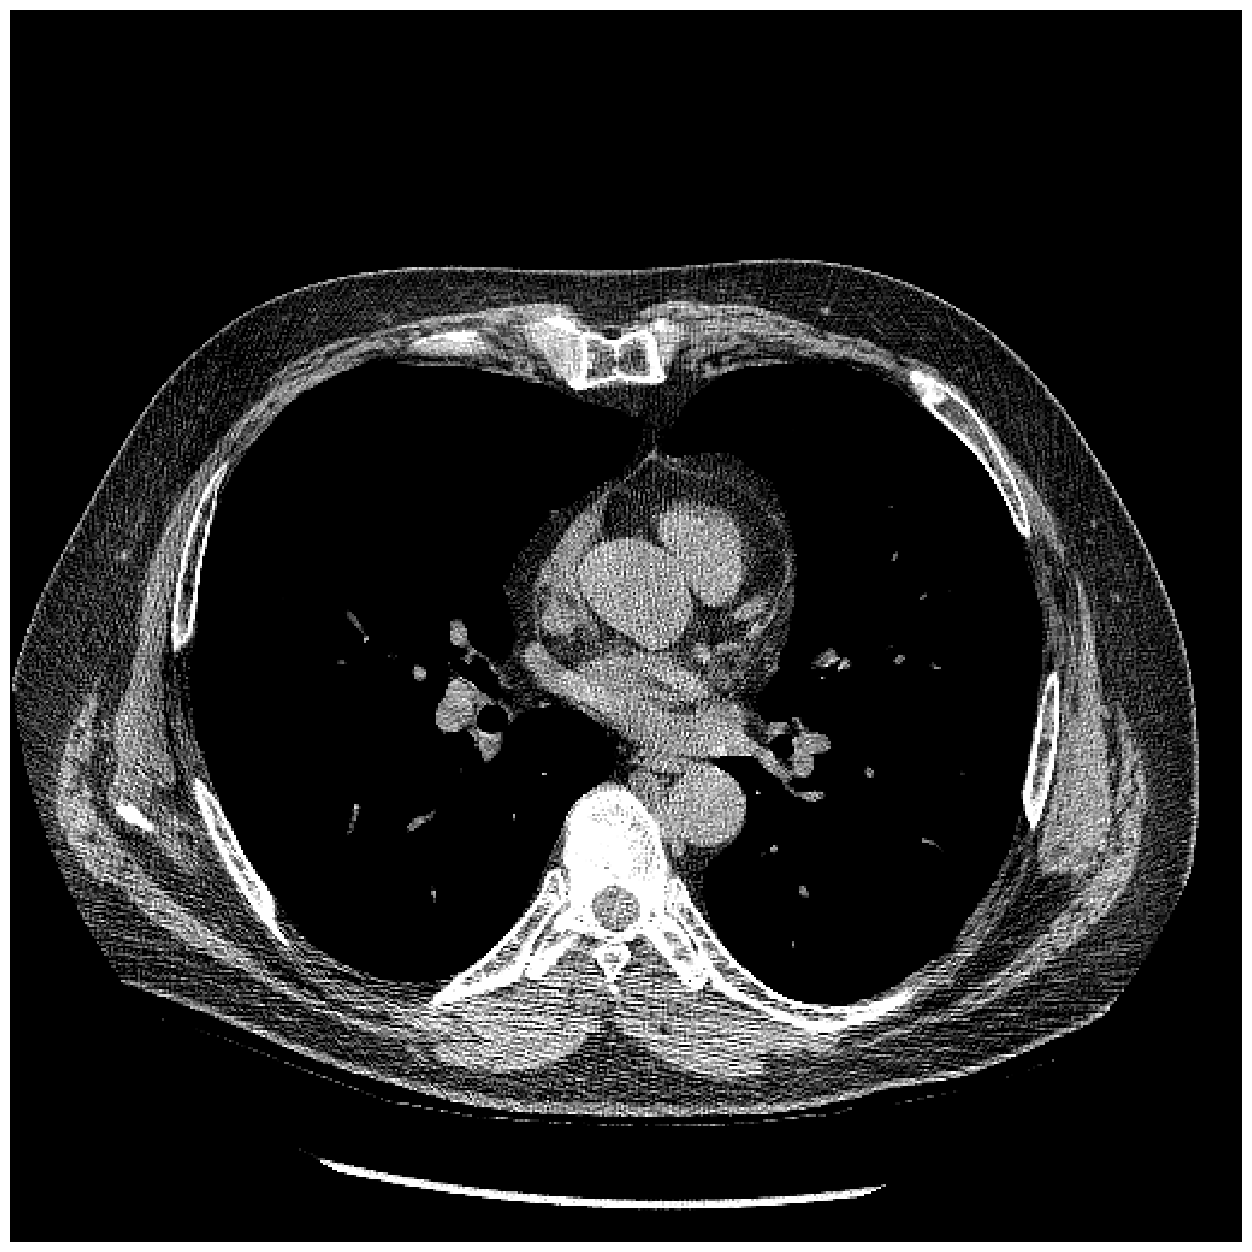

In [10]:
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(insp[:,:,midslice_insp]), cmap='gray', vmin=-150, vmax=150)
plt.axis('off')
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/insp_img.tiff", dpi=300, format='tiff')
plt.show()

### Images for registration 

In [19]:
bone = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_BONE/masked_COPDGene_L75615_BONE.nii.gz")
bone_img = bone.get_fdata()
std = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/images/clipped_masked_out_STANDARD/masked_COPDGene_L75615_STANDARD.nii.gz")
std_img = std.get_fdata()
warped_exp_to_insp = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_L75615_STANDARD/masked_COPDGene_L75615_STANDARD_Warped.nii.gz")
warped_img = warped_exp_to_insp.get_fdata()
warp_field = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_L75615_STANDARD/masked_COPDGene_L75615_STANDARD_1Warp.nii.gz")
warp_field_img = warp_field.get_fdata()

In [10]:
bone_pix_dim = bone.header['pixdim'][1:4]
std_pix_dim = std.header['pixdim'][1:4]
warped_pix_dim = warped_exp_to_insp.header['pixdim'][1:4]
warp_field_pix_dim = warp_field.header['pixdim'][1:4]

In [11]:
#Plot coronal plane for the images 
mid_slice_bone = bone.shape[1] // 2
mid_slice_std = std.shape[1] // 2
mid_slice_warped = warped_exp_to_insp.shape[1] // 2

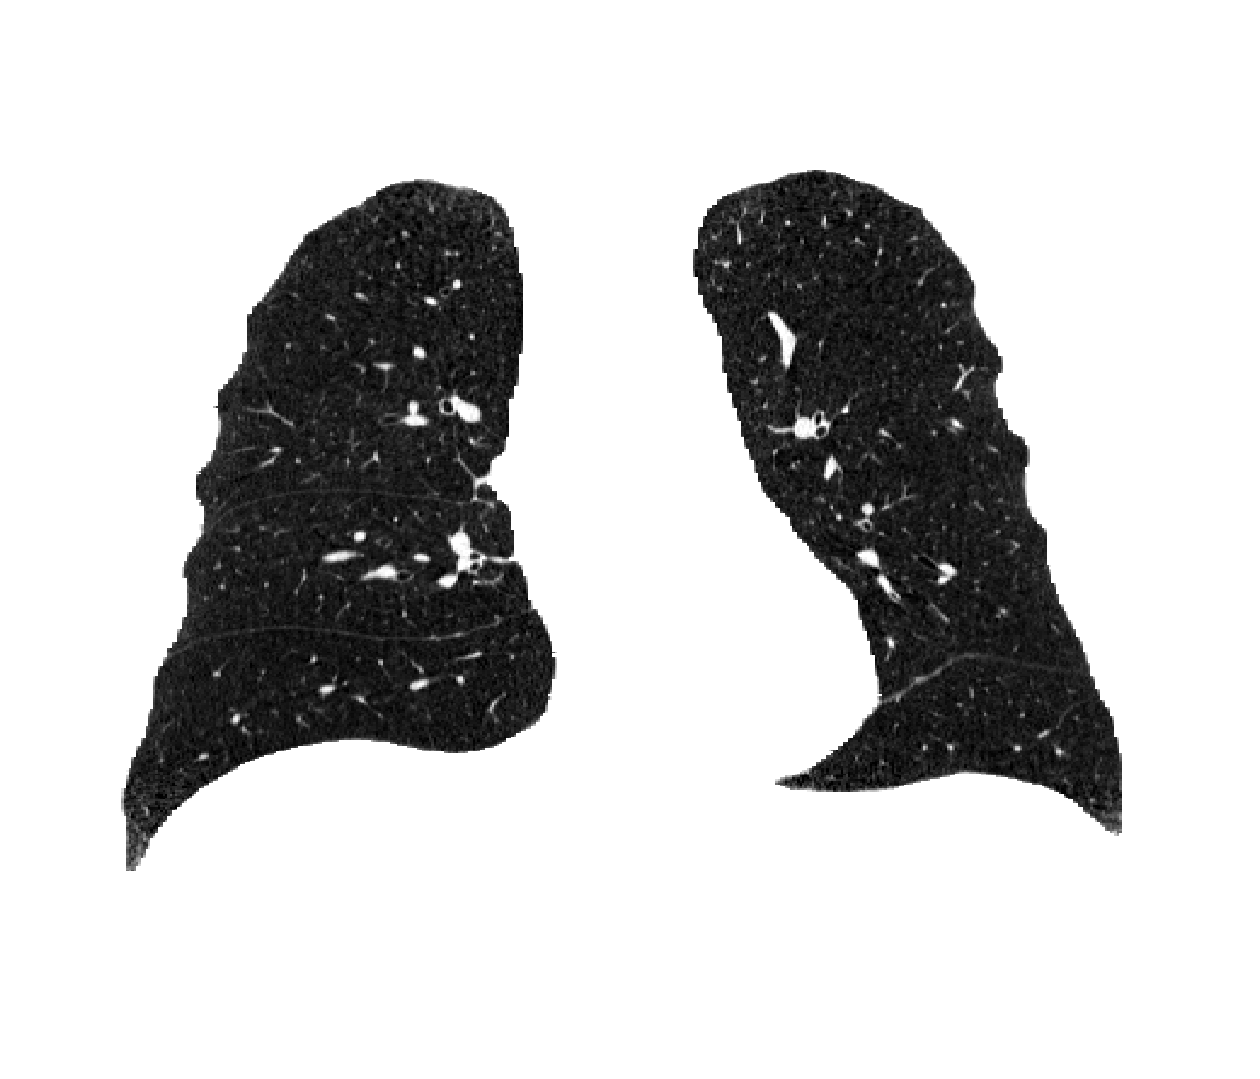

In [20]:
#plot the images 
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(bone_img[:,mid_slice_bone,:]), cmap='gray', vmin=-1024, vmax=0, aspect=bone_pix_dim[2]/bone_pix_dim[0])
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/bone_img_reg.tiff", dpi=300, format='tiff')
plt.axis('off')
plt.show()

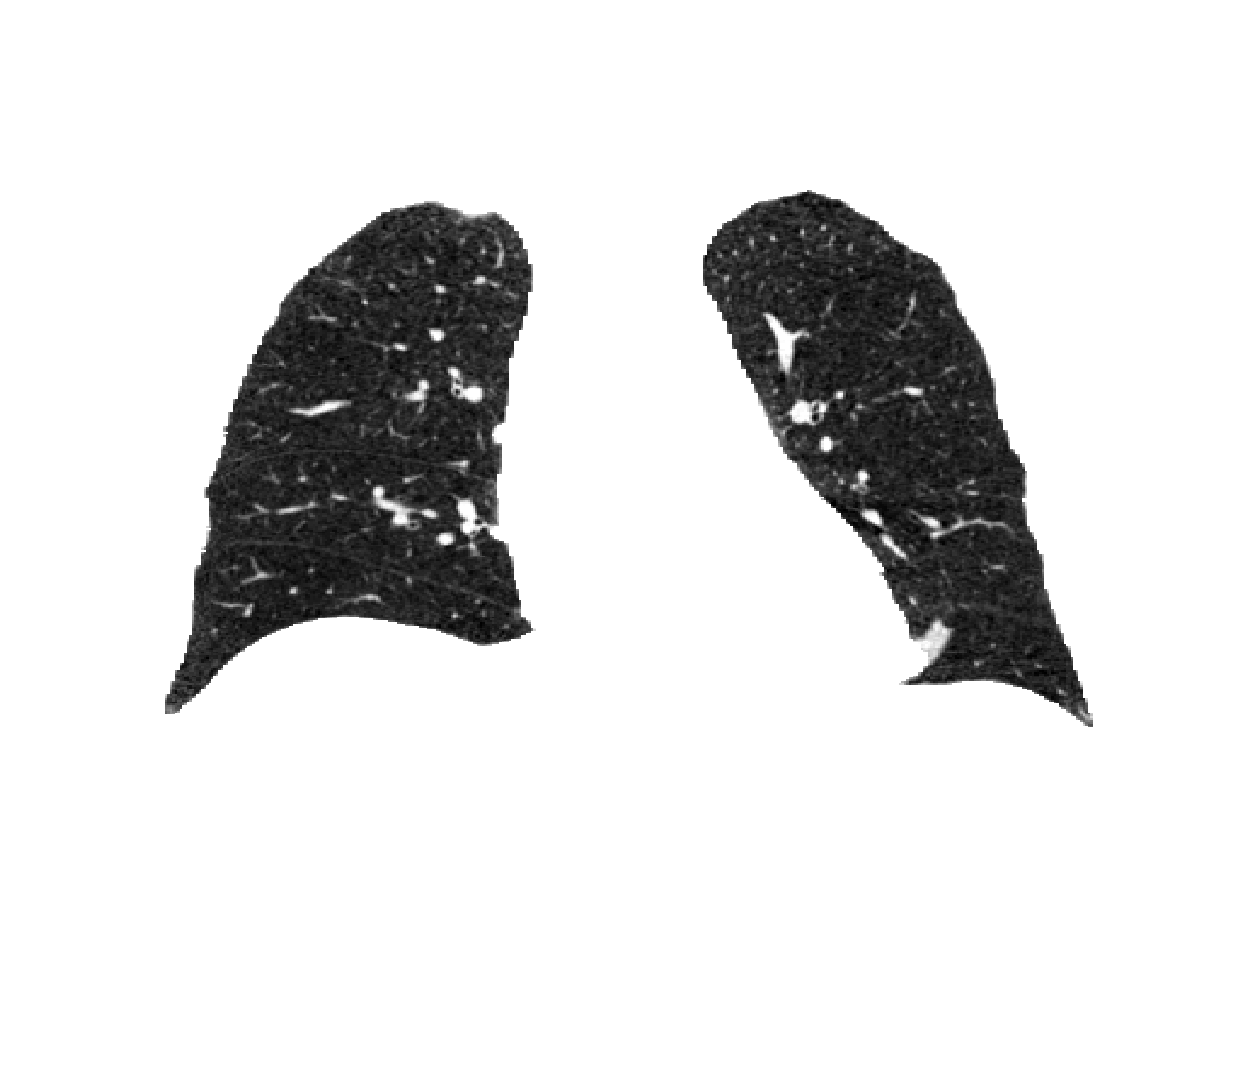

In [21]:
#plot the images 
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(std_img[:,mid_slice_std,:]), cmap='gray', vmin=-1024, vmax=0, aspect=std_pix_dim[2]/std_pix_dim[0])
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/std_img_reg.tiff", dpi=300, format='tiff')
plt.axis('off')
plt.show()

(-0.5, 511.5, 573.5, -0.5)

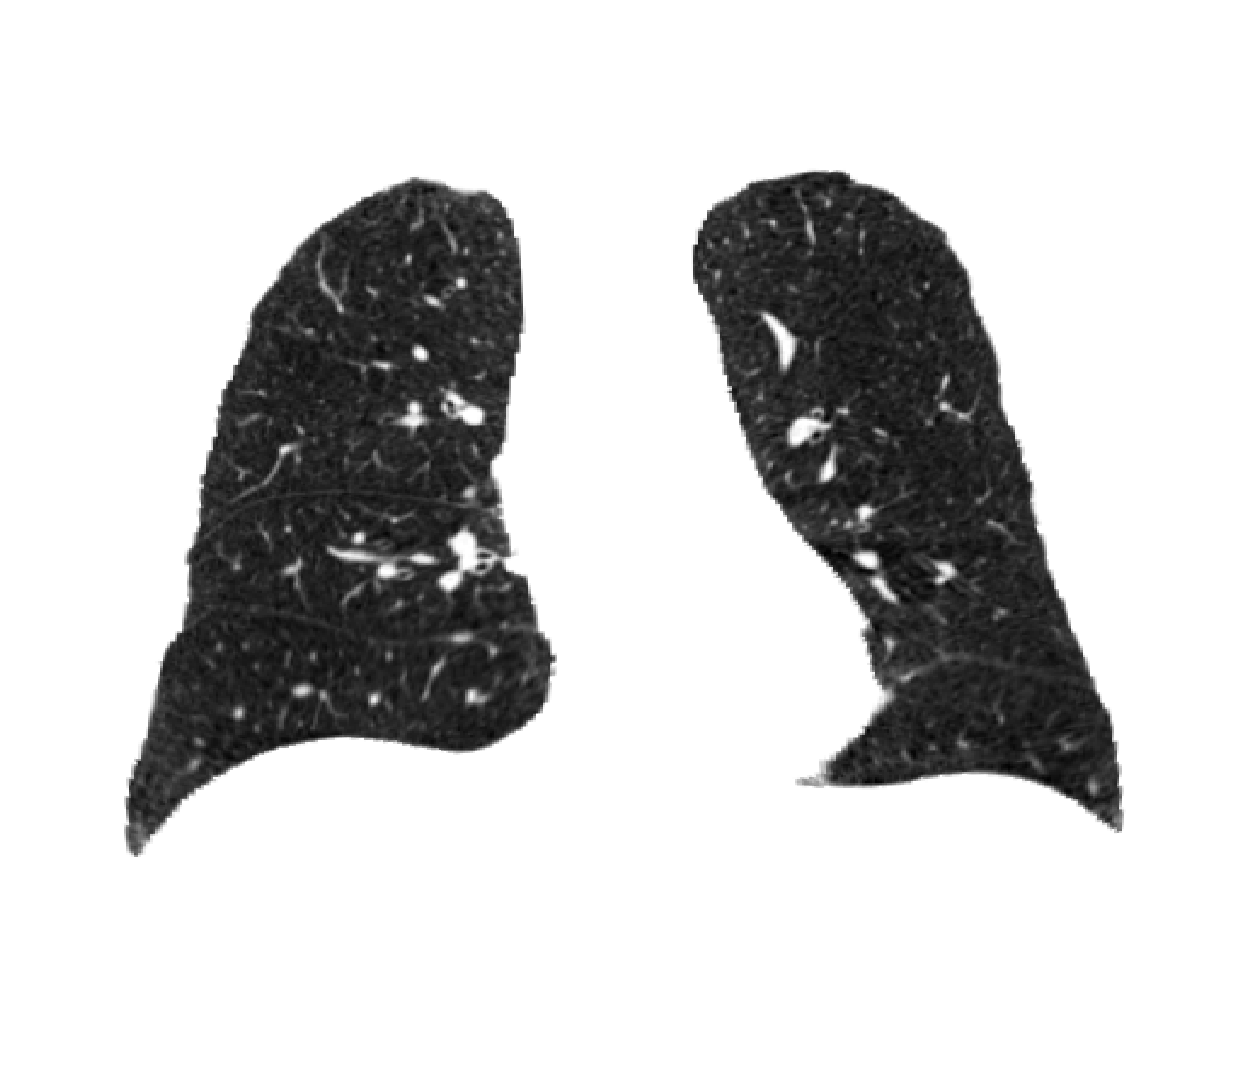

In [22]:
plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(warped_img[:,mid_slice_warped,:]), cmap='gray', vmin=-1024, vmax=0, aspect=warped_pix_dim[2]/warped_pix_dim[0])
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/warped_img_reg.tiff", dpi=300, format='tiff')
plt.axis('off')

In [24]:
warp_field_img.shape, warp_field_pix_dim

((85, 85, 71, 1, 3), array([4.921872, 4.921872, 5.      ], dtype=float32))

(-0.5, 84.5, 70.5, -0.5)

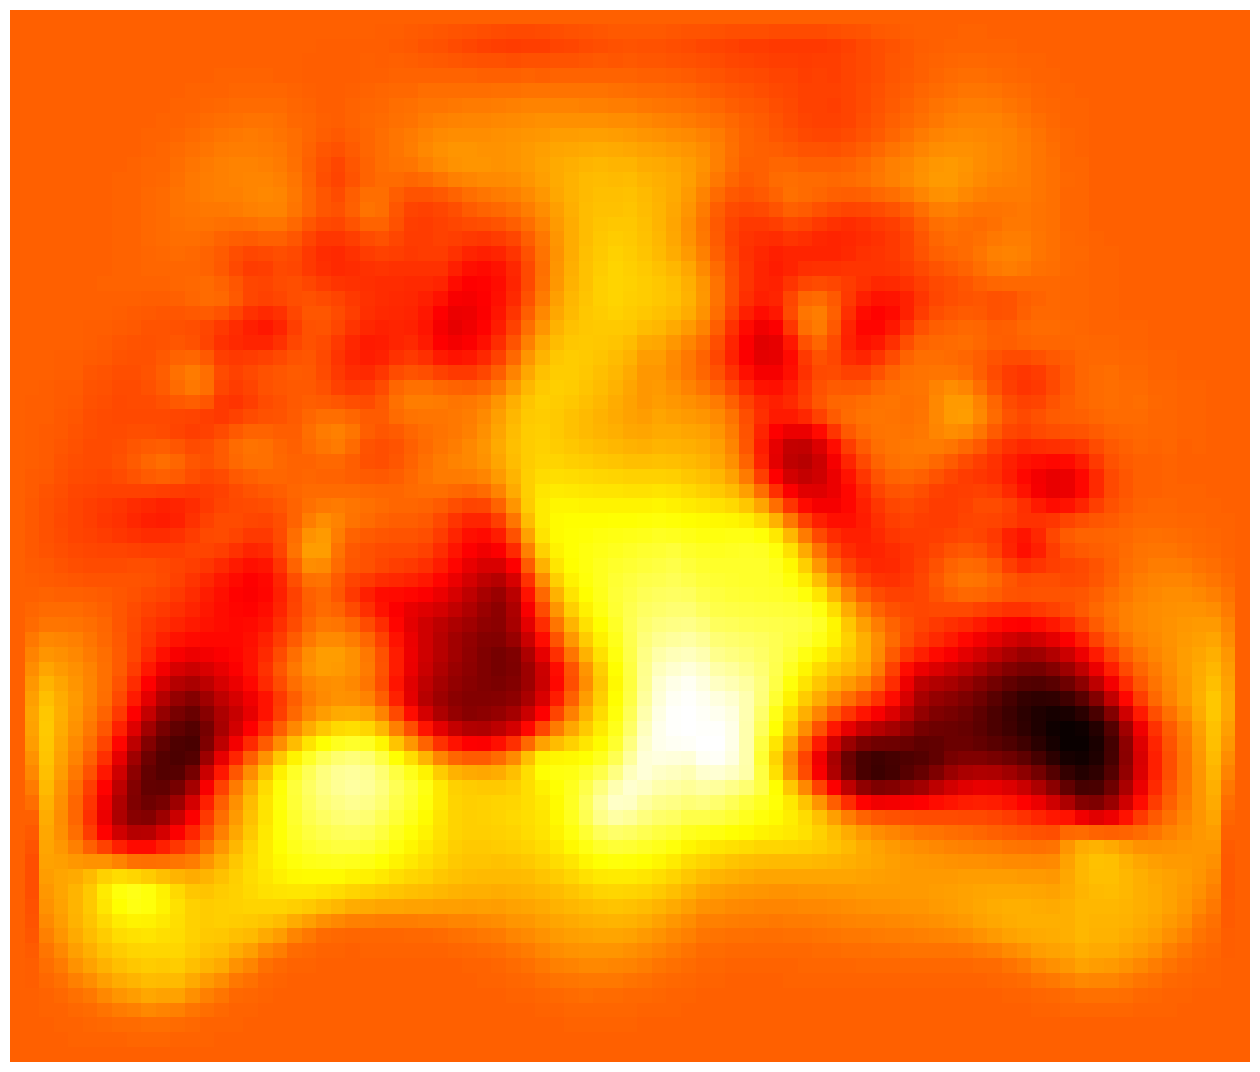

In [40]:
#plot the log jacbian determinant
jac_det = nib.load("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exp_toinsp_nonharmonized/masked_COPDGene_L75615_STANDARD/log_jacobian_det.nii.gz")
jac_det_img = jac_det.get_fdata()
midslice_jac = jac_det_img.shape[1] // 2

plt.figure(figsize=(16, 16))
plt.imshow(np.rot90(jac_det_img[:,midslice_jac,:]), cmap='hot', aspect=warp_field_pix_dim[2]/warp_field_pix_dim[0])
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/method_figures/jac_det_img_reg.tiff", dpi=300, format='tiff')
plt.axis('off')